In [214]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras.optimizers import Adam

import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load VGG16 pre-trained Model

In [217]:
base_model = VGG16(weights='imagenet',
                   include_top=False, 
                   input_shape=(96, 96, 3))

# Freeze the layers of VGG16 (execpt the last 4 layer "fine-tune")  

In [220]:
for layer in base_model.layers[-4:]:
    layer.trainable = False

# Create Model

In [223]:
# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(6, activation='softmax')
])

In [225]:
#summary
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 3, 3, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,582 (56.64 MB)

 Trainable params: 7,768,646 (29.64 MB)

 Non-trainable params: 7,079,936 (27.01 MB)

# Model Compilation

In [228]:
model.compile(optimizer = Adam(learning_rate=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Data augmentation

In [231]:
# training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  
    width_shift_range=0.3,  
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
)
# validation data (without augmentation)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation sets

In [234]:
# training data
train_generator = train_datagen.flow_from_directory(
    '../Emotion_application/train',
    target_size = (96,96),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 18192 images belonging to 6 classes.


In [236]:
# validation data
validation_generator = validation_datagen.flow_from_directory(
    '../Emotion_application/test',
    target_size = (96,96),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 6030 images belonging to 6 classes.


In [238]:
# Callbacks for better training
early_stopping = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True)

# Train the Model

In [241]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs = 20,  
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks = [early_stopping]
)

Epoch 1/20
568/568 ━━━━━━━━━━━━━━━━━━━━ 1078s 2s/step - accuracy: 0.2438 - loss: 1.7932 - val_accuracy: 0.3333 - val_loss: 1.5784
Epoch 2/20
568/568 ━━━━━━━━━━━━━━━━━━━━ 2s 615us/step - accuracy: 0.4062 - loss: 1.3071 - val_accuracy: 0.2857 - val_loss: 1.5188
Epoch 3/20
568/568 ━━━━━━━━━━━━━━━━━━━━ 1076s 2s/step - accuracy: 0.4613 - loss: 1.3047 - val_accuracy: 0.3908 - val_loss: 1.8124
Epoch 4/20
568/568 ━━━━━━━━━━━━━━━━━━━━ 2s 503us/step - accuracy: 0.6875 - loss: 0.7622 - val_accuracy: 0.2857 - val_loss: 2.7984
Epoch 5/20
568/568 ━━━━━━━━━━━━━━━━━━━━ 1108s 2s/step - accuracy: 0.5817 - loss: 1.0500 - val_accuracy: 0.6272 - val_loss: 0.9371
Epoch 6/20
568/568 ━━━━━━━━━━━━━━━━━━━━ 2s 559us/step - accuracy: 0.7500 - loss: 0.7810 - val_accuracy: 0.7143 - val_loss: 0.6347
Epoch 7/20
568/568 ━━━━━━━━━━━━━━━━━━━━ 1075s 2s/step - accuracy: 0.6342 - loss: 0.9373 - val_accuracy: 0.5934 - val_loss: 1.1094
Epoch 8/20
568/568 ━━━━━━━━━━━━━━━━━━━━ 2s 529us/step - accuracy: 0.6875 - loss: 0.7841 - 

In [269]:
model.save('emotion_detection_model.keras')

In [271]:
import tensorflow as tf

# Load the model in .keras or .h5 format
model = tf.keras.models.load_model('emotion_detection_model.keras')  # Or 'emotion_detection_model.h5'

# Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Optional: Enable optimizations
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('emotion_detection_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model successfully converted to TensorFlow Lite!")

INFO:tensorflow:Assets written to: C:\Users\CHAKOR\AppData\Local\Temp\tmp6qozc88l\assets


INFO:tensorflow:Assets written to: C:\Users\CHAKOR\AppData\Local\Temp\tmp6qozc88l\assets


Saved artifact at 'C:\Users\CHAKOR\AppData\Local\Temp\tmp6qozc88l'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name='input_layer_16')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  1607003289360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1607003289552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1607003288016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1607003288784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1607003283792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1606967033488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1607003284944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1607003288976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1607007273424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1607007274576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1607

In [243]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Loss: {loss}, Accuracy: {accuracy *100:.2f}%")

189/189 ━━━━━━━━━━━━━━━━━━━━ 96s 510ms/step - accuracy: 0.6083 - loss: 1.0123
Loss: 1.0005114078521729, Accuracy: 60.86%


In [249]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the class labels
CLASS_NAMES = ["anger", "fear", "happy","neutral", "sad","surprise"]

def predict_emotion(model, image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(96, 96))  # Resize to match the model's input size
    img_array = img_to_array(img)  # Convert to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize to [0, 1]
    
    # Predict probabilities for each class
    predictions = model.predict(img_array)[0]  
    predicted_class_index = np.argmax(predictions)  # Get the class index with the highest probability
    predicted_class_name = CLASS_NAMES[predicted_class_index]  # Map index to class name

    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(load_img(image_path))  
    plt.title(f"Predicted: {predicted_class_name}", fontsize=16)
    plt.axis("off")  
    plt.show()

    # Print the prediction details
    print(f"Predicted Probabilities: {predictions}")
    print(f"Predicted Class: {predicted_class_name} (Confidence: {predictions[predicted_class_index]:.2f})")
    
    return predicted_class_name

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


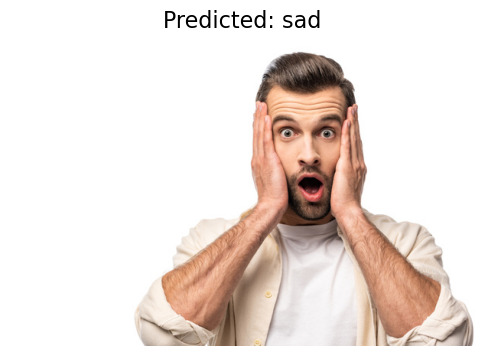

Predicted Probabilities: [0.09764966 0.1849422  0.00667391 0.07406434 0.48972514 0.14694472]
Predicted Class: sad (Confidence: 0.49)


'sad'

In [273]:
predict_emotion(model, 'sur1.jpg')

In [3]:
print(tf.__version__)

2.18.0
